## EDA & Cleaning of Water Pump Dataset

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
water_labels = pd.read_csv('./data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')

In [300]:
water_values = pd.read_csv('./data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')

In [301]:
water_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [302]:
water_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [303]:
water_pump = pd.merge(left=water_values, right=water_labels, on='id')

### Merging two datasets together and exporting to one combined CSV

In [19]:
water_pump.to_csv('./data/water_pump_info_jp.csv', index=False)

In [305]:
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [306]:
water_pump.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### Examining columns and deciding what to drop initially

In [307]:
water_pump.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [308]:
water_pump.loc[:,['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private']]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0


In [309]:
water_pump['num_private'].unique()

array([   0,   39,    5,   45,    6,    3,  698,   32,   15,    7,   25,
        102,    1,   93,   14,   34,  120,   17,  213,   47,    8,   41,
         80,  141,   20,   35,  131,    4,   22,   11,   87,   61,   65,
        136,    2,  180,   38,   62,    9,   16,   23,   42,   24,   12,
        668,  672,   58,  150,  280,  160,   50, 1776,   30,   27,   10,
         94,   26,  450,  240,  755,   60,  111,  300,   55, 1402],
      dtype=int64)

In [310]:
water_pump.drop(columns=['longitude', 'latitude', 'num_private'], inplace=True)

In [311]:
water_pump.loc[:,['basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga','ward', 'population', 'public_meeting', 'recorded_by']]

,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by
0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd
1,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd
2,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd
3,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd
4,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd
...,...,...,...,...,...,...,...,...,...,...
59395,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd
59396,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd
59397,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd
59398,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd


In [312]:
water_pump.drop(columns=['public_meeting', 'recorded_by'], inplace=True)

In [313]:
water_pump.loc[:,['scheme_management', 'scheme_name', 'permit', 'construction_year','extraction_type', 'extraction_type_group', 'extraction_type_class']]

,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class
0,VWC,Roman,False,1999,gravity,gravity,gravity
1,Other,NaN,True,2010,gravity,gravity,gravity
2,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity
3,VWC,NaN,True,1986,submersible,submersible,submersible
4,NaN,NaN,True,0,gravity,gravity,gravity
...,...,...,...,...,...,...,...
59395,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity
59396,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity
59397,VWC,NaN,False,0,swn 80,swn 80,handpump
59398,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump


In [314]:
water_pump.drop(columns=['extraction_type_group'], inplace=True)

In [315]:
water_pump.loc[:,['management', 'management_group', 'payment', 'payment_type','water_quality', 'quality_group', 'quantity', 'quantity_group']]

,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group
0,vwc,user-group,pay annually,annually,soft,good,enough,enough
1,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient
2,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough
3,vwc,user-group,never pay,never pay,soft,good,dry,dry
4,other,other,never pay,never pay,soft,good,seasonal,seasonal
...,...,...,...,...,...,...,...,...
59395,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough
59396,vwc,user-group,pay annually,annually,soft,good,enough,enough
59397,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough
59398,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient


In [316]:
water_pump.drop(columns=['management_group', 'payment', 'quantity_group'], inplace=True)

In [317]:
water_pump.loc[:,['source', 'source_type', 'source_class', 'waterpoint_type','waterpoint_type_group', 'status_group']]

,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...
59395,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [318]:
water_pump.drop(columns=['waterpoint_type_group'], inplace=True)

In [319]:
water_pump['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

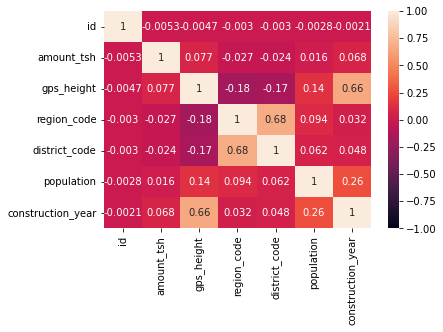

In [588]:
sns.heatmap(water_pump.corr(), annot=True, vmin=-1);

- This is just a heatmap for the correlation of the water pump dataset.

### Exporting cleaned CSV

In [28]:
water_pump.to_csv('./data/water_pump_info_cleaned_jp.csv', index=False)

In [271]:
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   wpt_name               59400 non-null  object 
 7   basin                  59400 non-null  object 
 8   subvillage             59029 non-null  object 
 9   region                 59400 non-null  object 
 10  region_code            59400 non-null  int64  
 11  district_code          59400 non-null  int64  
 12  lga                    59400 non-null  object 
 13  ward                   59400 non-null  object 
 14  population             59400 non-null  int64  
 15  sc

## EDA & Cleaning of 2012 Census Dataset

In [279]:
census = pd.read_csv('./data/Tanzania_2012_en.csv')

In [280]:
census.T

,0,1,2,3,4,5,6,7,8,9,...,60784,60785,60786,60787,60788,60789,60790,60791,60792,60793
Indicator,Children under-5 years severely underweight,Production of cement,Production of cement,Production of cement,Production of cement,Production of cement,Production of cement,Production of cement,Production of cement,Primary school net enrolment ratio,...,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Pre-primary net enrolment ratio,Children aged 0-17 years living in multidimens...
Unit,Percent,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,...,Total,Total,Other urban areas,Rural,Total,Total,Total,Other urban areas,Rural,Total
Area,Tanzania,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Kagera,...,Zanzibar,Dar-es-Salaam,Mainland,Mainland,Mainland,Zanzibar,Dar-es-Salaam,Mainland,Mainland,Tanzania
Area ID,TZA,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001018,...,TZA002,TZA001007,TZA001,TZA001,TZA001,TZA002,TZA001007,TZA001,TZA001,TZA
Time Period,2015-2016,2009,2010,2011,2012,2013,2014,2007,2008,2016,...,2010-2011,2012-2013,2012-2013,2012-2013,2012-2013,2012-2013,2010-2011,2010-2011,2010-2011,2016
Source,NBS_ TDHS (2015-2016)_2016,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoFEA_Economic Survey (ES)_Yearly,MoE&VT_BEST_Yearly,...,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,MoE&VT_BEST_Yearly,NBS/UNICEF_Child Poverty in Tanzania_2016
Data Value,2.7,34793.0,2313.0,2409.0,2581.0,2369819.0,2795687.0,1630.0,1756.0,76.123234,...,28.0,61.0,43.0,22.0,28.0,37.0,53.0,38.0,20.0,74.0
Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2010-2011TZA002Total28,2012-2013TZA001007Total61,2012-2013TZA001Other urban areas43,2012-2013TZA001Rural22,2012-2013TZA001Total28,2012-2013TZA002Total37,2010-2011TZA001007Total53,2010-2011TZA001Other urban areas38,2010-2011TZA001Rural20,Child Poverty in Tanzania 2016 National Bureau...


In [281]:
census = census.set_index('Indicator').T

#### Separating out columns pertaining to water

In [6]:
census['Water demand']

Indicator,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand,Water demand
Unit,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr
Subgroup,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban
Area,Dar-es-Salaam,Shinyanga,Mwanza,Arusha,Dar-es-Salaam,Shinyanga,Mwanza,Arusha,Dar-es-Salaam,Shinyanga,Mwanza,Arusha,Dar-es-Salaam,Shinyanga,Mwanza,Arusha,Dar-es-Salaam,Shinyanga,Mwanza,Arusha
Area ID,TZA001007,TZA001017,TZA001019,TZA001002,TZA001007,TZA001017,TZA001019,TZA001002,TZA001007,TZA001017,TZA001019,TZA001002,TZA001007,TZA001017,TZA001019,TZA001002,TZA001007,TZA001017,TZA001019,TZA001002
Time Period,2011-2012,2011-2012,2011-2012,2012-2013,2012-2013,2012-2013,2012-2013,2013-2014,2013-2014,2013-2014,2013-2014,2009-2010,2009-2010,2009-2010,2009-2010,2010-2011,2010-2011,2010-2011,2010-2011,2011-2012
Source,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...
Data Value,181.08,6.64,42.95,34.04,189.8,6.15,40.35,35.37,189.8,6.57,37.79,19.36,164.3,6.19,25.23,19.36,181.58,6.15,37.79,34.04
Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
census['Population using an improved drinking water source']

Indicator,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Rural,Rural,Total,Total,Total,Total,Urban,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban
Area,Mainland,Mainland,Mainland,Tanzania,Mainland,Zanzibar,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland
Area ID,TZA001,TZA001,TZA001,TZA,TZA001,TZA002,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001
Time Period,2004-2005,2010,2004-2005,2010,2010,2010,2004-2005,2010,2000-2001,2000-2001,2000-2001,2002,2002,2002,1991-1992,1991-1992,1991-1992,2007,2007,2007
Source,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,"NBS_Population and Housing Census, 2002_2003-2007","NBS_Population and Housing Census, 2002_2003-2007","NBS_Population and Housing Census, 2002_2003-2007",NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 2007_2009,NBS_Household Budget Survey (HBS) 2007_2009,NBS_Household Budget Survey (HBS) 2007_2009
Data Value,36.8,46.0,46.6,54.5,53.8,79.6,78.3,81.2,45.9,55.3,88.0,42.4,53.9,85.8,34.9,46.0,83.6,40.4,51.8,76.6
Footnotes,"TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Population and Housing Census (PHC) 2002, ...","TZA_Population and Housing Census (PHC) 2002, ...","TZA_Population and Housing Census (PHC) 2002, ...","TZA_Household Budget Survey (HBS) 1991-1992, N...","TZA_Household Budget Survey (HBS) 1991-1992, N...","TZA_Household Budget Survey (HBS) 1991-1992, N...",TZA_Tanzania Household Budget Survey (HBS) 20...,TZA_Tanzania Household Budget Survey (HBS) 20...,TZA_Tanzania Household Budget Survey (HBS) 20...


In [9]:
census['Water produced in urban water supply authority']

Indicator,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority,Water produced in urban water supply authority
Unit,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr,m3/yr
Subgroup,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban
Area,Dar-es-Salaam,Mwanza,Dar-es-Salaam,Mwanza,Arusha,Arusha,Mwanza,Arusha,Dar-es-Salaam,Mwanza,Arusha,Dar-es-Salaam,Mwanza,Arusha,Dar-es-Salaam,Mwanza,Arusha
Area ID,TZA001007,TZA001019,TZA001007,TZA001019,TZA001002,TZA001002,TZA001019,TZA001002,TZA001007,TZA001019,TZA001002,TZA001007,TZA001019,TZA001002,TZA001007,TZA001019,TZA001002
Time Period,2008-2009,2013-2014,2012-2013,2012-2013,2013-2014,2008-2009,2008-2009,2009-2010,2009-2010,2009-2010,2010-2011,2010-2011,2010-2011,2011-2012,2011-2012,2011-2012,2012-2013
Source,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...,MoWI/EWURA_Urban Water Supply Database- MajIs ...
Data Value,95.22,25.91,94.11,23.06,14.77,14.42,18.69,13.69,95.33,21.97,14.18,92.12,23.59,13.34,89.5,22.83,14.13
Footnotes,"TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da...","TZA_Ministry of Water, Urban Water Supply Da..."


In [11]:
census['Source of improved drinking water by households']

Indicator,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,...,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households,Source of improved drinking water by households
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,Piped Water into dwelling,...,Improved,Improved,Improved,Improved,Improved,Improved,Improved,Improved,Improved,Improved
Area,Kagera,Tarime,Mtwara,Kahama Township Authority,Lushoto,Korogwe,Muheza,Handeni,Kilindi,Uyui,...,Lindi Rural,Nachingwea,Kigoma,Liwale,Ruangwa,Lindi Urban,Babati,Hanang,Kiteto,Siha
Area ID,TZA001018,TZA001020001,TZA001009,TZA001017005,TZA001004001,TZA001004002,TZA001004003,TZA001004006,TZA001004007,TZA001014003,...,TZA001008002,TZA001008003,TZA001016,TZA001008004,TZA001008005,TZA001008006,TZA001021001,TZA001021002,TZA001021005,TZA001003007
Time Period,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
Source,"NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018",...,"NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018"
Data Value,2.9,1.5,8.1,17.5,5.2,5.6,10.4,13.1,2.1,0.2,...,47.9,17.2,59.1,36.8,27.5,58.5,58.5,55.4,24.7,97.4
Footnotes,"TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...",...,"TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Cen

In [20]:
census['Source of non improved drinking water by households']

Indicator,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,...,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households,Source of non improved drinking water by households
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Non-Improved,Non-Improved,Non-Improved,Non-Improved,Non-Improved,Non-Improved,Non-Improved,Non-Improved,Non-Improved,Non-Improved,...,Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.),Surface water (river dam lake etc.)
Area,Mbulu,Simanjiro,Rorya,Butiam,Kilosa,Katavi,Kilombero,Mbeya Rural,Kyela,Rungwe,...,Uvinza,Buhigwe,Kakonko,Kasulu Township Authority,Shinyanga,Shinyanga Urban,Kishapu,Shinyanga R,Kahama,Kahama Township Authority
Area ID,TZA001021003,TZA001021004,TZA001020006,TZA001020007,TZA001005001,TZA001023,TZA001005003,TZA001012002,TZA001012003,TZA001012004,...,TZA001016005,TZA001016006,TZA001016007,TZA001016008,TZA001017,TZA001017001,TZA001017002,TZA001017003,TZA001017004,TZA001017005
Time Period,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
Source,"NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018",...,"NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018","NBS_Population and Housing Census, 2012_2013-2018"
Data Value,56.2,54.8,89.2,73.7,40.4,55.7,28.6,55.6,31.7,43.4,...,39.0,18.7,16.1,12.8,17.9,5.9,56.9,25.1,7.1,1.8
Footnotes,"TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (PHC) 2012, ...","TZA_Population and Housing Census (

In [16]:
census['Quantity sold in a crops']

Indicator,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,...,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops,Quantity sold in a crops
Unit,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,...,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne
Subgroup,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,Maize Short rainy season,...,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season
Area,Rukwa,Kigoma,Shinyanga,Kagera,Mwanza,Mara,Manyara,Njombe,Katavi,Simiyu,...,Njombe,Katavi,Simiyu,Geita,Zanzibar,Kaskazini Unguja,Kusini Unguja,Mjini Magharibi,Kaskazini Pemba,Kusini Pemba
Area ID,TZA001015,TZA001016,TZA001017,TZA001018,TZA001019,TZA001020,TZA001021,TZA001022,TZA001023,TZA001024,...,TZA001022,TZA001023,TZA001024,TZA001025,TZA002,TZA002051,TZA002052,TZA002053,TZA002054,TZA002055
Time Period,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,...,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015
Source,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,...,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015
Data Value,0.0,97700.0,71.0,59255.0,15435.0,39525.0,416.0,4705.0,0.0,19976.0,...,0.0,0.0,0.0,0.0,917.0,258.0,592.0,67.0,0.0,0.0
Footnotes,"TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...",...,"TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201..."


In [23]:
census['Quantity harvested in crops']

Indicator,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,...,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops,Quantity harvested in crops
Unit,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,...,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne,Tonne
Subgroup,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,Sweet Potato Short rainy season,...,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season,Pumpkins Short rainy season
Area,Lindi,Mtwara,Ruvuma,Iringa,Mbeya,Singida,Tabora,Kaskazini Unguja,Kusini Unguja,Mjini Magharibi,...,Njombe,Katavi,Simiyu,Geita,Zanzibar,Kaskazini Unguja,Kusini Unguja,Mjini Magharibi,Kaskazini Pemba,Kusini Pemba
Area ID,TZA001008,TZA001009,TZA001010,TZA001011,TZA001012,TZA001013,TZA001014,TZA002051,TZA002052,TZA002053,...,TZA001022,TZA001023,TZA001024,TZA001025,TZA002,TZA002051,TZA002052,TZA002053,TZA002054,TZA002055
Time Period,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,...,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015
Source,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,...,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015,NBS_Annual Agricultural Sample Survey_2014-2015
Data Value,0.0,0.0,0.0,56.0,0.0,0.0,33787.0,2107.0,363.0,427.0,...,0.0,0.0,0.0,0.0,3100.0,660.0,2327.0,113.0,0.0,0.0
Footnotes,"TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...",...,"TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_Annual Agricultural Sample Survey,2014-201...","TZA_

In [24]:
census['Population with access to piped or protected water as their main source in regional centres']

Indicator,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,...,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres,Population with access to piped or protected water as their main source in regional centres
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,...,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total
Area,Lindi,Lindi,Lindi,Manyara,Manyara,Manyara,Manyara,Manyara,Mbeya,Mbeya,...,Rukwa,Singida,Singida,Singida,Singida,Singida,Tabora,Tabora,Tabora,Tabora
Area ID,TZA001008,TZA001008,TZA001008,TZA001021,TZA001021,TZA001021,TZA001021,TZA001021,TZA001012,TZA001012,...,TZA001015,TZA001013,TZA001013,TZA001013,TZA001013,TZA001013,TZA001014,TZA001014,TZA001014,TZA001014
Time Period,2012-2013,2013-2014,2014-2015,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2010-2011,2011-2012,...,2014-2015,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2010-2011,2011-2012,2012-2013,2013-2014
Source,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,...,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly
Data Value,70.0,58.0,63.0,68.4,68.5,84.0,88.0,88.0,95.0,96.2,...,62.0,88.0,89.5,62.0,62.0,65.0,86.5,86.5,77.0,79.0
Footnotes,TZA_EWURA Water Utilities Performance Review R...,TZA_EWURA Water Utilities Performance Review R...,TZA_EWURA Water Utilities Performance Review R...,TZA_EWURA Water U

In [25]:
census['Population using an improved drinking water source']

Indicator,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source,Population using an improved drinking water source
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Rural,Rural,Total,Total,Total,Total,Urban,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban
Area,Mainland,Mainland,Mainland,Tanzania,Mainland,Zanzibar,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland,Mainland
Area ID,TZA001,TZA001,TZA001,TZA,TZA001,TZA002,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001,TZA001
Time Period,2004-2005,2010,2004-2005,2010,2010,2010,2004-2005,2010,2000-2001,2000-2001,2000-2001,2002,2002,2002,1991-1992,1991-1992,1991-1992,2007,2007,2007
Source,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_ TDHS (2004-2005)_2005,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,"NBS_Population and Housing Census, 2002_2003-2007","NBS_Population and Housing Census, 2002_2003-2007","NBS_Population and Housing Census, 2002_2003-2007",NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 2007_2009,NBS_Household Budget Survey (HBS) 2007_2009,NBS_Household Budget Survey (HBS) 2007_2009
Data Value,36.8,46.0,46.6,54.5,53.8,79.6,78.3,81.2,45.9,55.3,88.0,42.4,53.9,85.8,34.9,46.0,83.6,40.4,51.8,76.6
Footnotes,"TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_ Demographic & Health Survey, 2004-2005, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Population and Housing Census (PHC) 2002, ...","TZA_Population and Housing Census (PHC) 2002, ...","TZA_Population and Housing Census (PHC) 2002, ...","TZA_Household Budget Survey (HBS) 1991-1992, N...","TZA_Household Budget Survey (HBS) 1991-1992, N...","TZA_Household Budget Survey (HBS) 1991-1992, N...",TZA_Tanzania Household Budget Survey (HBS) 20...,TZA_Tanzania Household Budget Survey (HBS) 20...,TZA_Tanzania Household Budget Survey (HBS) 20...


In [26]:
census['Improved water source']

Indicator,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source,Improved water source
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Total,Total,Total,Hospital,Healthy centre,Dispensary,Clinic,Government,Private for profit,Parastatal,Faith based
Area,Tanzania,Mainland,Zanzibar,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania
Area ID,TZA,TZA001,TZA002,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA
Time Period,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015
Source,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...
Data Value,68.0,67.0,90.0,87.0,84.0,65.0,89.0,61.0,88.0,85.0,86.0
Footnotes,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...


In [27]:
census['Households within 1 km of drinking water in dry seasons']

Indicator,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,...,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons,Households within 1 km of drinking water in dry seasons
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Other urban areas,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,...,Urban,Urban,Urban,Urban,Urban,Urban,Other urban areas,Rural,Total,Total
Area,Mainland,Mbeya,Mara,Morogoro,Arusha,Mtwara,Pwani,Mwanza,Ruvuma,Rukwa,...,Iringa,Dodoma,Kigoma,Kagera,Kilimanjaro,Lindi,Mainland,Mainland,Dar-es-Salaam,Mainland
Area ID,TZA001,TZA001012,TZA001020,TZA001005,TZA001002,TZA001009,TZA001006,TZA001019,TZA001010,TZA001015,...,TZA001011,TZA001001,TZA001016,TZA001018,TZA001003,TZA001008,TZA001,TZA001,TZA001007,TZA001
Time Period,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,...,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,2000-2001,1991-1992,1991-1992,1991-1992,1991-1992
Source,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,...,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 2000-2001_2002,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...,NBS_Household Budget Survey (HBS) 1991-1992_19...
Data Value,73.2,71.0,22.0,58.0,39.0,33.0,51.0,32.0,89.0,61.0,...,73.0,63.0,51.0,59.0,73.0,60.0,66.8,43.8,88.5,49.9
Footnotes,"TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...",...,"TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZA_Household Budget Survey (HBS) 2000-2001, N...","TZ

In [232]:
census_water = census.loc[:,['Water produced in urban water supply authority', 'Water demand', 'Water coverage', 
             'Source of improved drinking water by households', 'Source of non improved drinking water by households',
             'Population with access to piped or protected water as their main source in regional centres',
             'Households within 1 km of drinking water in dry seasons', 
             'Households within 15 minutes to water supply in dry seasons']]

census_water.T.loc['Water demand'].sort_values(by='Time Period')

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Water demand,m3/yr,Urban,Mwanza,TZA001019,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,25.23,NaN
Water demand,m3/yr,Urban,Shinyanga,TZA001017,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,6.19,NaN
Water demand,m3/yr,Urban,Dar-es-Salaam,TZA001007,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,164.3,NaN
Water demand,m3/yr,Urban,Arusha,TZA001002,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,19.36,NaN
Water demand,m3/yr,Urban,Shinyanga,TZA001017,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,6.15,NaN
Water demand,m3/yr,Urban,Dar-es-Salaam,TZA001007,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,181.58,NaN
Water demand,m3/yr,Urban,Arusha,TZA001002,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,19.36,NaN
Water demand,m3/yr,Urban,Mwanza,TZA001019,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,37.79,NaN
Water demand,m3/yr,Urban,Dar-es-Salaam,TZA001007,2011-2012,MoWI/EWURA_Urban Water Supply Database- MajIs ...,181.08,NaN


#### Columns pertaining to water, from different cleaned CSV from Kaleb based on 2012 Census data

In [36]:
water = pd.read_csv('./data/tz_regions_water.csv', index_col='Indicator')
water = water.drop(columns='Unnamed: 0')
water_demand = water.loc['Water demand'].sort_values(by='Time Period')
water_demand.drop(columns='Footnotes', inplace=True)
water_demand

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Water demand,m3/yr,Urban,Arusha,TZA001002,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,19.36
Water demand,m3/yr,Urban,Shinyanga,TZA001017,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,6.19
Water demand,m3/yr,Urban,Mwanza,TZA001019,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,25.23
Water demand,m3/yr,Urban,Arusha,TZA001002,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,19.36
Water demand,m3/yr,Urban,Shinyanga,TZA001017,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,6.15
Water demand,m3/yr,Urban,Mwanza,TZA001019,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,37.79
Water demand,m3/yr,Urban,Shinyanga,TZA001017,2011-2012,MoWI/EWURA_Urban Water Supply Database- MajIs ...,6.64
Water demand,m3/yr,Urban,Mwanza,TZA001019,2011-2012,MoWI/EWURA_Urban Water Supply Database- MajIs ...,42.95
Water demand,m3/yr,Urban,Arusha,TZA001002,2011-2012,MoWI/EWURA_Urban Water Supply Database- MajIs ...,34.04


##### Separating out the different columns pertaining to water

In [37]:
water_demand_table = water_demand.pivot_table(values='Data Value', columns='Area', index='Time Period')
water_demand_table

Area,Arusha,Mwanza,Shinyanga
Time Period,,,
2009-2010,19.36,25.23,6.19
2010-2011,19.36,37.79,6.15
2011-2012,34.04,42.95,6.64
2012-2013,34.04,40.35,6.15
2013-2014,35.37,37.79,6.57


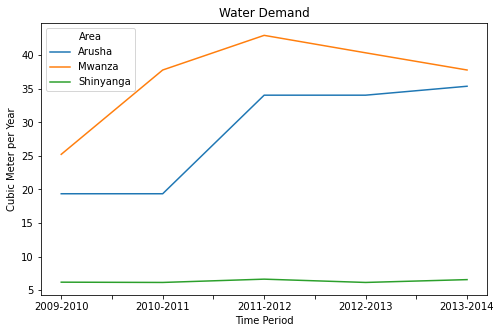

In [619]:
water_demand_table.plot(figsize=(8,5))
plt.title('Water Demand')
plt.ylabel('Cubic Meter per Year')
plt.savefig('./images_jp/water demand.png', transparent=True, bbox_inches = 'tight');

- The above plot shows how vastly different the demand for water is in these 3 regions.

In [38]:
water_supply = water.loc['Water produced in urban water supply authority'].sort_values(by='Time Period')
water_supply.drop(columns='Footnotes', inplace=True)
water_supply

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Water produced in urban water supply authority,m3/yr,Urban,Arusha,TZA001002,2008-2009,MoWI/EWURA_Urban Water Supply Database- MajIs ...,14.42
Water produced in urban water supply authority,m3/yr,Urban,Mwanza,TZA001019,2008-2009,MoWI/EWURA_Urban Water Supply Database- MajIs ...,18.69
Water produced in urban water supply authority,m3/yr,Urban,Arusha,TZA001002,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,13.69
Water produced in urban water supply authority,m3/yr,Urban,Mwanza,TZA001019,2009-2010,MoWI/EWURA_Urban Water Supply Database- MajIs ...,21.97
Water produced in urban water supply authority,m3/yr,Urban,Arusha,TZA001002,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,14.18
Water produced in urban water supply authority,m3/yr,Urban,Mwanza,TZA001019,2010-2011,MoWI/EWURA_Urban Water Supply Database- MajIs ...,23.59
Water produced in urban water supply authority,m3/yr,Urban,Arusha,TZA001002,2011-2012,MoWI/EWURA_Urban Water Supply Database- MajIs ...,13.34
Water produced in urban water supply authority,m3/yr,Urban,Mwanza,TZA001019,2011-2012,MoWI/EWURA_Urban Water Supply Database- MajIs ...,22.83
Water produced in urban water supply authority,m3/yr,Urban,Mwanza,TZA001019,2012-2013,MoWI/EWURA_Urban Water Supply Database- MajIs ...,23.06


In [864]:
water_supply_table = water_supply.pivot_table(values='Data Value', columns='Area', index='Time Period')
water_supply_table

Area,Arusha,Mwanza
Time Period,,
2008-2009,14.42,18.69
2009-2010,13.69,21.97
2010-2011,14.18,23.59
2011-2012,13.34,22.83
2012-2013,14.13,23.06
2013-2014,14.77,25.91


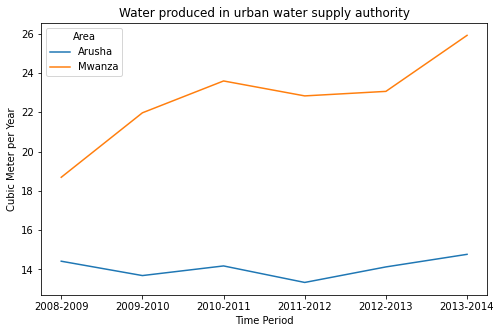

In [620]:
water_supply_table.plot(figsize=(8,5))
plt.title('Water produced in urban water supply authority')
plt.ylabel('Cubic Meter per Year')
plt.savefig('./images_jp/water produced in urban supply.png', transparent=True, bbox_inches = 'tight');

- The above plot is again showing the vast difference between the regions for the amount of water produced in urban areas.

In [830]:
water_coverage = water.loc['Water coverage'].sort_values(by='Time Period')
water_coverage = water_coverage[water_coverage['Source']=='MoWI_Rural Water Supply Database_Yearly']
water_coverage.drop(columns='Footnotes', inplace=True)
water_coverage = water_coverage[water_coverage['Area']!='Njombe']   # filtering out the regions that aren't in the
water_coverage = water_coverage[water_coverage['Area']!='Katavi']   # water pump dataset
water_coverage = water_coverage[water_coverage['Area']!='Geita']
water_coverage.head()

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Water coverage,Percent,Rural,Rukwa,TZA001015,2008,MoWI_Rural Water Supply Database_Yearly,51.1
Water coverage,Percent,Rural,Dodoma,TZA001001,2008,MoWI_Rural Water Supply Database_Yearly,65.3
Water coverage,Percent,Rural,Kilimanjaro,TZA001003,2008,MoWI_Rural Water Supply Database_Yearly,68.8
Water coverage,Percent,Rural,Tanga,TZA001004,2008,MoWI_Rural Water Supply Database_Yearly,73.9
Water coverage,Percent,Rural,Morogoro,TZA001005,2008,MoWI_Rural Water Supply Database_Yearly,66.2


In [831]:
water_coverage_table = water_coverage.pivot_table(values='Data Value', columns='Area', index='Time Period', fill_value=0)
water_coverage_table  # just making a table of the above DF

Area,Arusha,Dodoma,Iringa,Kagera,Kigoma,Kilimanjaro,Lindi,Manyara,Mara,Mbeya,Morogoro,Mtwara,Mwanza,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tabora,Tanga
Time Period,,,,,,,,,,,,,,,,,,,,
2008,59.600000,65.300000,70.200000,50.500000,57.700000,68.800000,54.400000,53.400000,51.10,59.600000,66.200000,70.900000,58.60000,69.100000,51.100000,56.000000,49.600000,47.400000,43.600000,73.900000
2009,66.720000,61.210000,66.830000,58.860000,62.650000,69.090000,51.010000,52.540000,54.07,61.210000,66.190000,65.060000,57.02000,65.940000,52.410000,57.730000,51.530000,49.000000,44.570000,68.900000
2010,60.840000,59.660000,65.930000,57.850000,62.280000,68.890000,40.120000,52.850000,54.70,60.040000,58.580000,67.040000,61.49000,64.800000,53.920000,57.240000,52.160000,51.360000,38.850000,65.710000
2011,58.530000,50.040000,65.820000,56.010000,60.190000,73.070000,41.380000,63.010000,51.04,60.040000,61.890000,49.400000,58.28000,64.600000,54.670000,59.910000,50.070000,50.440000,43.360000,58.230000
2012,60.663329,47.037215,64.949601,57.206598,59.621191,74.444593,37.120964,62.908008,49.00,52.685361,63.101115,45.093115,61.98289,66.082933,45.687155,58.810995,51.612049,49.886863,46.843831,59.846986


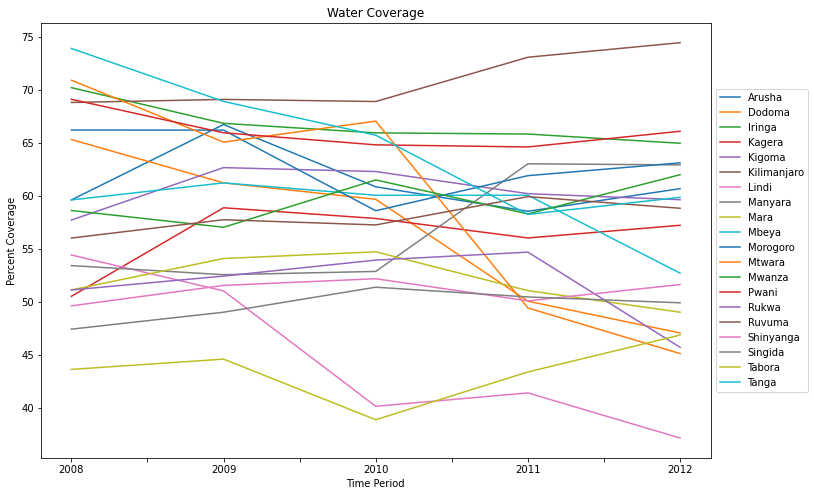

In [621]:
water_coverage_table.plot(figsize=(12,8))
plt.title('Water Coverage')
plt.ylabel('Percent Coverage')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('./images_jp/water coverage.png', transparent=True, bbox_inches = 'tight');

- This plot is showing the water coverage per region. Some of these areas had drastic differences between the years. You can also see how different the regions are from each other with such a large range in the percent of coverage overall over the years.

In [834]:
water_source_improved = water.loc['Source of improved drinking water by households'].sort_values(by='Area')
water_source_improved = water_source_improved[water_source_improved['Area ID']!='TZA001002006'].sort_values(by='Area')
water_source_improved = water_source_improved[water_source_improved['Area ID']!='TZA001013002'].sort_values(by='Area')
water_source_improved = water_source_improved[water_source_improved['Area ID']!='TZA001005002'].sort_values(by='Area')
water_source_improved = water_source_improved[water_source_improved['Area ID']!='TZA001025001'].sort_values(by='Area')
water_source_improved = water_source_improved[water_source_improved['Area']!='Simiyu']
water_source_improved = water_source_improved[water_source_improved['Area']!='Njombe']
water_source_improved = water_source_improved[water_source_improved['Area']!='Katavi']
water_source_improved = water_source_improved[water_source_improved['Area']!='Geita']
water_source_improved = water_source_improved[water_source_improved['Subgroup']!='Improved']
water_source_improved.head(3)   # filtering out the duplicate regions and those that aren't in the water pump dataset

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Source of improved drinking water by households,Percent,Protected Spring,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",1.6,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of improved drinking water by households,Percent,Rain water collection,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",0.3,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of improved drinking water by households,Percent,Piped Water into dwelling,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",19.9,"TZA_Population and Housing Census (PHC) 2012, ..."


In [177]:
water_source_improved_table = water_source_improved.pivot_table(values='Data Value', columns='Area', index='Subgroup')
water_source_improved_table

Area,Arusha,Dodoma,Iringa,Kagera,Kigoma,Kilimanjaro,Lindi,Manyara,Mara,Mbeya,Morogoro,Mtwara,Mwanza,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tabora,Tanga
Subgroup,,,,,,,,,,,,,,,,,,,,
Piped Water into dwelling,19.9,10.7,10.2,2.9,7.7,31.9,6.2,7.4,6.0,16.0,12.9,8.1,12.2,11.1,6.8,12.5,8.3,4.8,3.6,12.0
Piped Water to yard/plot,17.1,6.5,9.1,3.1,5.4,23.2,2.3,5.2,4.0,10.0,9.1,2.8,10.9,9.9,2.1,9.7,8.5,1.8,3.1,8.9
Protected Spring,1.6,0.6,1.5,11.0,13.4,1.5,0.8,1.1,2.1,2.7,0.4,0.8,1.7,0.4,3.1,3.4,0.3,0.5,0.3,1.1
Protected dug well,3.8,4.0,7.1,4.8,8.7,1.3,7.8,4.0,7.6,7.8,7.1,3.2,9.7,9.5,7.3,10.3,11.7,7.2,11.4,4.9
Public tap/ standpipe,34.2,26.7,22.7,10.9,18.8,25.3,10.0,24.5,5.4,15.0,19.7,17.5,11.7,15.0,12.4,16.0,8.7,14.1,4.6,17.3
Rain water collection,0.3,0.3,0.1,2.0,0.1,0.4,2.0,0.3,2.7,0.1,0.1,18.0,0.2,0.6,0.0,0.0,0.3,0.3,0.1,1.0
Tube well/ borehole,1.3,5.8,4.8,4.3,5.0,1.5,5.9,5.9,5.1,3.6,13.2,1.8,10.6,4.7,10.1,9.2,5.4,9.8,4.2,2.8


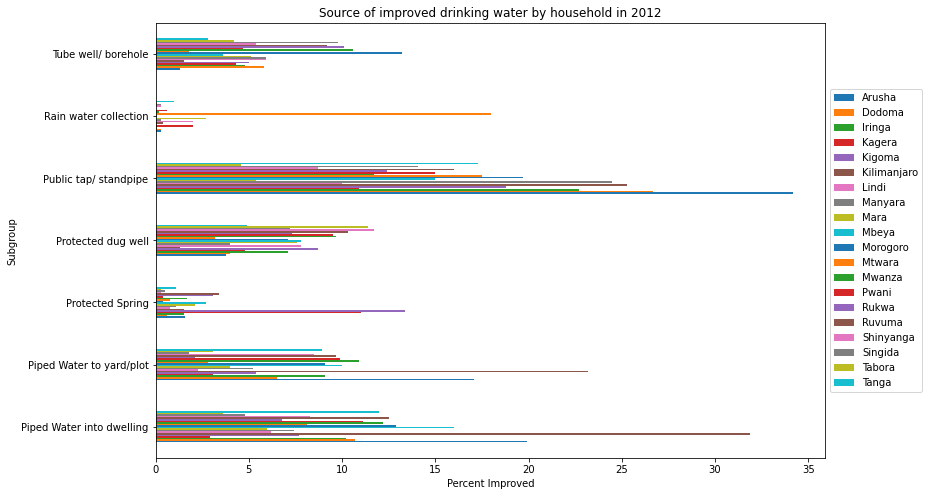

In [681]:
water_source_improved_table.plot(figsize=(12,8), kind='barh')
plt.xlabel('Percent Improved')
plt.title('Source of improved drinking water by household in 2012')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('./images_jp/improved water source.png', transparent=True, bbox_inches = 'tight');

- This is showing the sources for improved drinking water. It appears that as a whole the public tap/standpipe is the largest source, though some regions really stick out in some areas over others.

In [835]:
water_source_non_impr = water.loc['Source of non improved drinking water by households'].sort_values(by='Area')
water_source_non_impr = water_source_non_impr[water_source_non_impr['Area ID']!='TZA001002006'].sort_values(by='Subgroup')
water_source_non_impr = water_source_non_impr[water_source_non_impr['Area ID']!='TZA001013002'].sort_values(by='Area')
water_source_non_impr = water_source_non_impr[water_source_non_impr['Area ID']!='TZA001005002'].sort_values(by='Area')
water_source_non_impr = water_source_non_impr[water_source_non_impr['Area ID']!='TZA001025001'].sort_values(by='Area')
water_source_non_impr = water_source_non_impr[water_source_non_impr['Area']!='Simiyu']
water_source_non_impr = water_source_non_impr[water_source_non_impr['Area']!='Njombe']
water_source_non_impr = water_source_non_impr[water_source_non_impr['Area']!='Katavi']
water_source_non_impr = water_source_non_impr[water_source_non_impr['Area']!='Geita']
water_source_non_impr = water_source_non_impr[water_source_non_impr['Subgroup']!='Non-Improved']
water_source_non_impr.head()   # filtering out duplicate regions and regions not in water pump dataset
# also removing the 'non-improved' section due to redundancy

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Source of non improved drinking water by households,Percent,Bottled water,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",0.2,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of non improved drinking water by households,Percent,Cart with small tank/drum,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",2.4,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of non improved drinking water by households,Percent,Unprotected dug well,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",3.0,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of non improved drinking water by households,Percent,Tanker truck,Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",0.3,"TZA_Population and Housing Census (PHC) 2012, ..."
Source of non improved drinking water by households,Percent,Surface water (river dam lake etc.),Arusha,TZA001002,2012,"NBS_Population and Housing Census, 2012_2013-2018",9.0,"TZA_Population and Housing Census (PHC) 2012, ..."


In [180]:
water_source_non_impr_table = water_source_non_impr.pivot_table(values='Data Value', columns='Area', index='Subgroup')
water_source_non_impr_table

Area,Arusha,Dodoma,Iringa,Kagera,Kigoma,Kilimanjaro,Lindi,Manyara,Mara,Mbeya,Morogoro,Mtwara,Mwanza,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tabora,Tanga
Subgroup,,,,,,,,,,,,,,,,,,,,
Bottled water,0.2,0.2,0.1,0.2,0.1,0.1,0.2,0.3,0.3,0.1,0.1,0.3,0.2,0.1,0.1,0.1,0.2,0.1,0.1,0.2
Cart with small tank/drum,2.4,5.2,1.9,0.3,2.6,1.6,1.5,6.6,0.6,0.7,1.3,2.2,0.7,1.2,0.4,0.0,5.0,1.5,2.2,1.2
Surface water (river dam lake etc.),9.0,4.9,13.4,19.3,17.0,4.2,10.4,11.8,23.5,12.7,12.2,15.3,9.3,10.6,18.2,7.5,17.9,14.9,9.7,14.0
Tanker truck,0.3,0.3,0.1,0.1,0.2,0.2,0.6,3.4,0.3,0.1,1.0,0.3,0.1,1.3,0.1,0.0,0.2,0.1,0.1,1.8
Unprotected Spring,6.9,4.8,16.0,32.6,10.3,7.8,7.2,10.6,19.2,16.7,7.7,7.4,10.1,3.2,17.3,14.5,6.2,11.7,5.0,16.0
Unprotected dug well,3.0,30.2,13.0,8.6,11.0,1.1,45.2,18.9,23.0,14.5,15.2,22.3,22.6,32.3,22.1,16.8,27.3,33.4,55.4,18.7


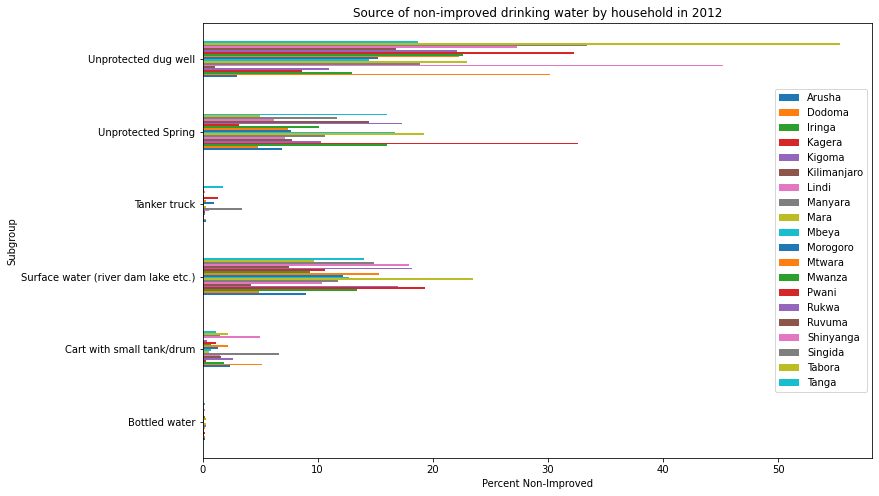

In [623]:
water_source_non_impr_table.plot(figsize=(12,8), kind='barh')
plt.xlabel('Percent Non-Improved')
plt.title('Source of non-improved drinking water by household in 2012')
plt.legend(loc='center right')
plt.savefig('./images_jp/non-improved water source.png', transparent=True, bbox_inches = 'tight');

- This is showing the sources of non-improved drinking water. As a whole, unprotected dug wells are the largest source.

In [561]:
water_pop = water.loc['Population with access to piped or protected water as their main source in regional centres']\
    .sort_values(by='Time Period')
water_pop = water_pop.sort_values(by='Area')
water_pop.drop(columns='Footnotes', inplace=True)
water_pop = water_pop[water_pop['Area']!='Simiyu']  # filtering out regions not in water pump dataset
water_pop = water_pop[water_pop['Area']!='Njombe']
water_pop = water_pop[water_pop['Area']!='Katavi']
water_pop = water_pop[water_pop['Area']!='Geita']
water_pop.head(2)

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Population with access to piped or protected water as their main source in regional centres,Percent,Total,Arusha,TZA001002,2010-2011,EWURA_Water Utilities Performance Review_Yearly,97.5
Population with access to piped or protected water as their main source in regional centres,Percent,Total,Arusha,TZA001002,2013-2014,EWURA_Water Utilities Performance Review_Yearly,82.0


In [210]:
water_pop_table = water_pop.pivot_table(values='Data Value', columns='Area', index='Time Period')
water_pop_table

Area,Arusha,Dodoma,Iringa,Kagera,Kigoma,Kilimanjaro,Lindi,Manyara,Mbeya,Morogoro,Mtwara,Mwanza,Rukwa,Ruvuma,Shinyanga,Singida,Tabora,Tanga
Time Period,,,,,,,,,,,,,,,,,,
2010-2011,97.5,88.7,96.0,71.1,67.0,95.3,41.0,68.4,95.0,94.0,81.7,93.4,62.8,81.0,77.5,88.0,86.5,92.0
2011-2012,70.4,86.7,84.0,71.1,68.7,95.3,41.0,68.5,96.2,94.0,92.5,90.0,61.6,87.8,78.3,89.5,86.5,98.4
2012-2013,78.0,81.0,96.0,76.0,71.0,100.0,70.0,84.0,97.0,90.0,88.0,94.0,62.0,64.0,59.0,62.0,77.0,99.0
2013-2014,82.0,81.0,96.0,76.0,68.0,100.0,58.0,88.0,97.0,90.0,81.0,96.0,62.0,69.0,59.0,62.0,79.0,99.0
2014-2015,82.0,82.0,95.0,78.0,69.0,100.0,63.0,88.0,97.0,90.0,90.0,91.0,62.0,71.0,61.0,65.0,80.0,97.0


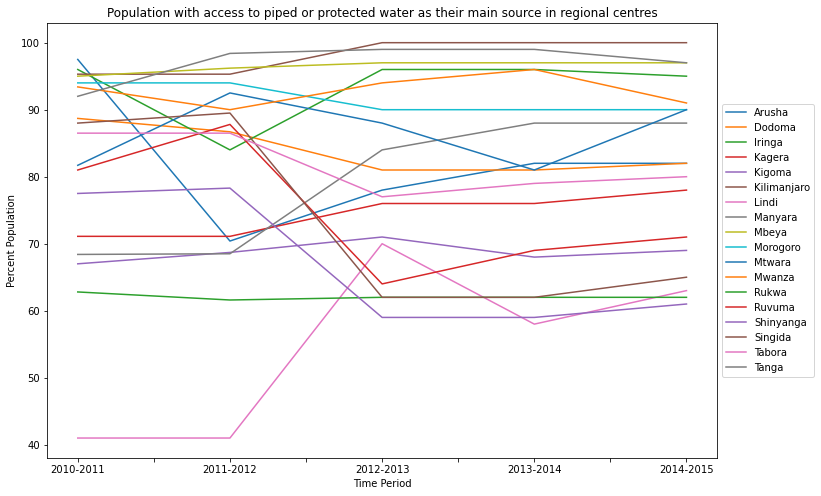

In [624]:
water_pop_table.plot(figsize=(12,8))
plt.title('Population with access to piped or protected water as their main source in regional centres')
plt.ylabel('Percent Population')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('./images_jp/access to piped water.png', transparent=True, bbox_inches = 'tight');

- This is showing the percent of the population with access to piped or protected water as their main source. You can see how vastly different some of these regions are from each other and the inequality.

In [836]:
water_1km = water.loc['Households within 1 km of drinking water in dry seasons'].sort_values(by='Area')
water_1km = water_1km[water_1km['Subgroup']=='Total']  # filtering to just the subgroup 'total'
water_1km.drop(columns='Footnotes', inplace=True)
water_1km.head(2)

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Households within 1 km of drinking water in dry seasons,Percent,Total,Arusha,TZA001002,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,49.0
Households within 1 km of drinking water in dry seasons,Percent,Total,Dodoma,TZA001001,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,49.0


In [560]:
water_1km_table = water_1km.pivot_table(values='Data Value', index='Area').sort_values(by='Data Value')
water_1km_table.head(2)

,Data Value
Area,
Mara,31.0
Mwanza,40.0


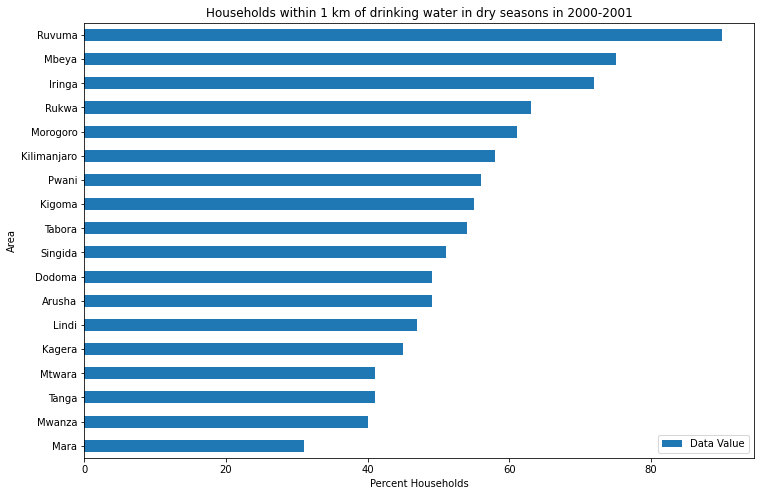

In [625]:
water_1km_table.plot(kind='barh', figsize=(12,8))
plt.title('Households within 1 km of drinking water in dry seasons in 2000-2001')
plt.xlabel('Percent Households')
plt.savefig('./images_jp/households 1km from water.png', transparent=True, bbox_inches = 'tight');

- This is showing the percent of households within 1 km of drinking water in dry seasons, organized from highest to lowest percentages. Ruvuma has the highest where Mara has the lowest.

In [562]:
water_15min = water.loc['Households within 15 minutes to water supply in dry seasons'].sort_values(by='Area')
water_15min.drop(columns='Footnotes', inplace=True)
water_15min.head(2)

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Households within 15 minutes to water supply in dry seasons,Percent,Total,Arusha,TZA001002,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,65.8
Households within 15 minutes to water supply in dry seasons,Percent,Total,Dodoma,TZA001001,2000-2001,NBS_Household Budget Survey (HBS) 2000-2001_2002,71.3


In [563]:
water_15min_table = water_15min.pivot_table(values='Data Value', index='Area').sort_values(by='Data Value')
water_15min_table.head(2)

,Data Value
Area,
Mtwara,44.1
Mara,51.1


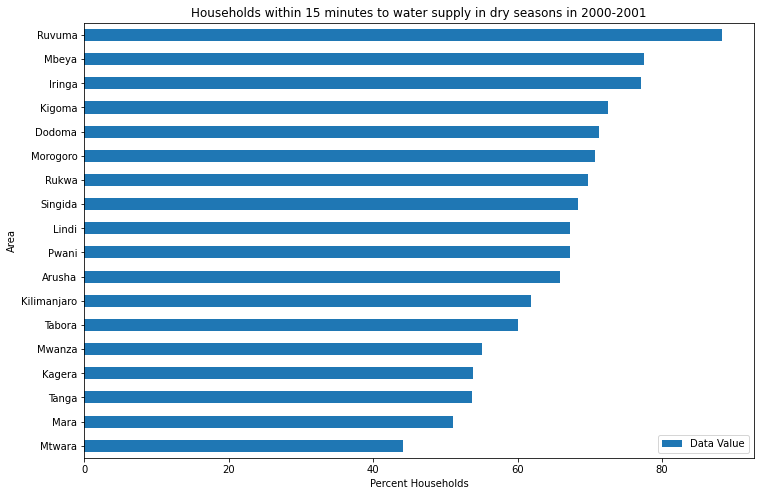

In [626]:
water_15min_table.plot(kind='barh', figsize=(12,8))
plt.title('Households within 15 minutes to water supply in dry seasons in 2000-2001')
plt.xlabel('Percent Households')
plt.savefig('./images_jp/households 15 min from water.png', transparent=True, bbox_inches = 'tight');

- This is showing the percentage of households within 15 minutes of a water supply in dry seasons. Here, Ruvuma is still the highest, but Mtwara is now the lowest.

In [847]:
region_water = pd.read_csv('./data/tz_regions_water.csv', index_col=0)
region_water = region_water[region_water['Area']!='Simiyu']
region_water = region_water[region_water['Area']!='Njombe']  # filtering out regions not in the water pump dataset
region_water = region_water[region_water['Area']!='Katavi']
region_water = region_water[region_water['Area']!='Geita']
region_water.head(2)

,Indicator,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
898,Water coverage,Percent,Rural,Kilimanjaro,TZA001003,2008,EWURA_Water Utilities Performance Review_Yearly,68.80,NaN
899,Water coverage,Percent,Rural,Kilimanjaro,TZA001003,2009,EWURA_Water Utilities Performance Review_Yearly,69.09,NaN


In [263]:
region_water_table = region_water.pivot_table(values='Data Value', columns='Area', index='Time Period', fill_value=0)

#### Separating out columns pertaining to health

In [236]:
census_health = census.loc[:,['Urine protein', 'Projected infant mortality rate', 'Projected life expectancy at birth',
             'Population with disability', 'Post neonatal mortality rate',
             'Population 7 years and above, with difficulty in cognition',
             'Population 7 years and above, with difficulty in communication',
             'Population 7 years and above, with difficulty in hearing',
             'Population 7 years and above, with difficulty in mobility',
             'Population 7 years and above, with difficulty in seeing',
             'Deworming coverage', 'Children under-5 years with diarrhoea',
             'Children under-5 years with diarrhoea taken to a health facility/provider',
             'Children under-5 years who drink more fluids during diarrhoea',
             'Children under-5 years who given ORS and zinc during diarrhoea',
             'Children under-5 years who receive any ORT for diarrhoea', 'Children under-5 years with fever']]

census_health

Indicator,Urine protein,Urine protein,Urine protein,Urine protein,Urine protein,Urine protein,Urine protein,Urine protein,Urine protein,Urine protein,...,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever,Children under-5 years with fever
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Total,Total,Total,Hospital,Healthy centre,Dispensary,Clinic,Government,Private for profit,Parastatal,...,Urban,Female,Male,Rural,Rural,Total,Total,Total,Urban,Urban
Area,Tanzania,Mainland,Zanzibar,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,...,Mainland,Tanzania,Tanzania,Tanzania,Mainland,Tanzania,Mainland,Zanzibar,Tanzania,Mainland
Area ID,TZA,TZA001,TZA002,TZA,TZA,TZA,TZA,TZA,TZA,TZA,...,TZA001,TZA,TZA,TZA,TZA001,TZA,TZA001,TZA002,TZA,TZA001
Time Period,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015,...,2004-2005,1999,1999,1999,1999,1999,1999,1999,1999,1999
Source,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,NBS_Tanzania Service Provision Assessment (TSP...,...,NBS_ TDHS (2004-2005)_2005,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...,NBS_Tanzania Reproductive and Child Health Sur...
Data Value,27.0,27.0,38.0,83.0,65.0,20.0,29.0,17.0,58.0,32.0,...,22.3,33.7,36.5,35.5,35.4,35.1,35.0,38.6,33.4,33.6
Footnotes,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,TZA_Tanzania Service Provision Assessment (TSP...,...,"TZA_ Demographic & Health Survey, 2004-2005, N...",TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...,TZA_Tanzania Reproductive and Child Health Sur...


In [564]:
census_health_tanzania = census_health.T[census_health.T['Area'] == 'Tanzania']
census_health_tanzania.head(2)

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Urine protein,Percent,Total,Tanzania,TZA,2014-2015,NBS_Tanzania Service Provision Assessment (TSP...,27.0,TZA_Tanzania Service Provision Assessment (TSP...
Urine protein,Percent,Hospital,Tanzania,TZA,2014-2015,NBS_Tanzania Service Provision Assessment (TSP...,83.0,TZA_Tanzania Service Provision Assessment (TSP...


In [565]:
census_health_mainland = census_health.T[census_health.T['Area'] == 'Mainland']
census_health_mainland.head(2)

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Urine protein,Percent,Total,Mainland,TZA001,2014-2015,NBS_Tanzania Service Provision Assessment (TSP...,27.0,TZA_Tanzania Service Provision Assessment (TSP...
Projected infant mortality rate,"Deaths per 1,000 live births",Total,Mainland,TZA001,2014,"NBS_Population and Housing Census, 2012_2013-2018",40.7,"TZA_National Projections, 2018, National Burea..."


In [566]:
census_health_zanzibar = census_health.T[census_health.T['Area'] == 'Zanzibar']
census_health_zanzibar.head(2)

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Urine protein,Percent,Total,Zanzibar,TZA002,2014-2015,NBS_Tanzania Service Provision Assessment (TSP...,38.0,TZA_Tanzania Service Provision Assessment (TSP...
Projected infant mortality rate,"Deaths per 1,000 live births",Total,Zanzibar,TZA002,2014,"NBS_Population and Housing Census, 2012_2013-2018",36.5,"TZA_National Projections, 2018, National Burea..."


In [567]:
census_health_subarea = census_health.loc[:,['Deworming coverage', 'Children under-5 years with diarrhoea', 
                     'Children under-5 years who drink more fluids during diarrhoea']].T

census_health_subarea.head(3)

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Deworming coverage,Percent,By Card,Tanzania,TZA,2014,TFNC_Tanzania National Nutrition Survey 2014_2014,25.1,TZA_Tanzania National Nutrition Survey _2014
Deworming coverage,Percent,By Card,Mainland,TZA001,2014,TFNC_Tanzania National Nutrition Survey 2014_2014,25.4,TZA_Tanzania National Nutrition Survey _2014
Deworming coverage,Percent,By Card,Dodoma,TZA001001,2014,TFNC_Tanzania National Nutrition Survey 2014_2014,0.0,TZA_Tanzania National Nutrition Survey _2014


In [568]:
census_health_diarrhoea = census_health_subarea.T['Children under-5 years with diarrhoea'].T[['Subgroup', 'Area', 'Time Period', 'Data Value']].sort_values(by='Area')
census_health_diarrhoea.head(2)

,Subgroup,Area,Time Period,Data Value
Indicator,,,,
Children under-5 years with diarrhoea,Total,Arusha,2004-2005,10.8
Children under-5 years with diarrhoea,Total,Arusha,1996,14.8


In [569]:
census_health_total_diar = census_health_diarrhoea[census_health_diarrhoea['Subgroup'] == 'Total']
census_health_total_diar.head(2)

,Subgroup,Area,Time Period,Data Value
Indicator,,,,
Children under-5 years with diarrhoea,Total,Arusha,2004-2005,10.8
Children under-5 years with diarrhoea,Total,Arusha,1996,14.8


### Separating out columns pertaining to inequality/socioeconomic from census data

In [522]:
socioecon = pd.read_csv('./data/tz_regions_socioecon.csv', index_col='Indicator')
socioecon.drop(columns=['Footnotes', 'Unnamed: 0'], inplace=True)

In [838]:
socioecon = socioecon[socioecon['Area']!='Simiyu']
socioecon = socioecon[socioecon['Area']!='Njombe']  #filtering out regions not in water pump dataset
socioecon = socioecon[socioecon['Area']!='Katavi']
socioecon = socioecon[socioecon['Area']!='Geita']

In [840]:
socioecon = socioecon[socioecon['Time Period'] > '1999']  # filtering to more recent years

In [525]:
socioecon.T.columns.value_counts()

GDP per capita (at current prices)                                         258
Health worker density per 10,000 population- (Clinicians=MO,AMO and CO)     60
Health worker density per 10,000 population-nurse and midwife               60
Human development index                                                     57
Health insurance coverage age 15-49                                         40
Name: Indicator, dtype: int64

In [841]:
gdp = socioecon.loc['GDP per capita (at current prices)'].sort_values(by='Time Period')
gdp['USD'] = gdp['Data Value'] * 0.00043  # converting tanzanian shillings to USD for comparison
gdp.head(2)

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,USD
Indicator,,,,,,,,
GDP per capita (at current prices),Tshs,Total,Iringa,TZA001011,2000,MoFEA_Economic Survey (ES)_Yearly,217041.07,93.327660
GDP per capita (at current prices),Tshs,Total,Shinyanga,TZA001017,2000,MoFEA_Economic Survey (ES)_Yearly,231554.70,99.568521


In [531]:
gdp_table = gdp.pivot_table(values='USD', columns='Area', index='Time Period', fill_value=0)

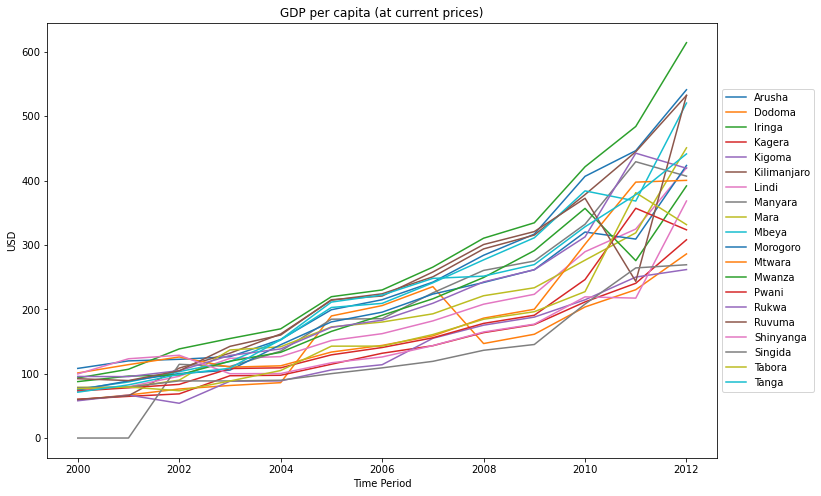

In [627]:
gdp_table.plot(figsize=(12,8))
plt.title('GDP per capita (at current prices)')
plt.ylabel('USD')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('./images_jp/gpd per capita.png', transparent=True, bbox_inches = 'tight'); 

- This is showing the GDP per capita over the years. You can see the general trend of all regions increasing.

In [422]:
health_worker_clinician = socioecon.loc['Health worker density per 10,000 population- (Clinicians=MO,AMO and CO)']\
            .sort_values(by='Time Period')
health_worker_clinician.head(2)

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
"Health worker density per 10,000 population- (Clinicians=MO,AMO and CO)",Ratio,Total,Lindi,TZA001008,2011,MoHSW_HRIS Annual Report_Yearly,0.77
"Health worker density per 10,000 population- (Clinicians=MO,AMO and CO)",Ratio,Total,Tanga,TZA001004,2011,MoHSW_HRIS Annual Report_Yearly,0.75


In [426]:
health_worker_clinician_table = health_worker_clinician.pivot_table(
    values='Data Value', columns='Area', index='Time Period'
)

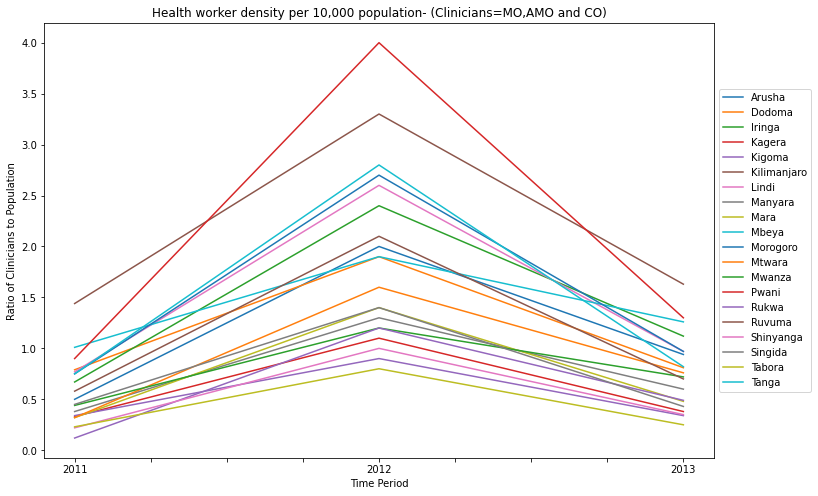

In [628]:
health_worker_clinician_table.plot(figsize=(12,8))
plt.title('Health worker density per 10,000 population- (Clinicians=MO,AMO and CO)')
plt.ylabel('Ratio of Clinicians to Population')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('./images_jp/clinician density.png', transparent=True, bbox_inches = 'tight');  # look into types of clinicians

- This is showing the healthcare clinician density per 10,000 people. This is referring to Medical Officers (MO), Assistant Medical Officer (AMO), and Clinical Officer (CO). There is a distinct trend for all regions where the amount of healthcare clinicians increased in 2012 and then decreases again in 2013.

In [435]:
health_worker_nurse = socioecon.loc['Health worker density per 10,000 population-nurse and midwife']\
        .sort_values(by='Time Period')
health_worker_nurse.head(2)

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
"Health worker density per 10,000 population-nurse and midwife",Ratio,Total,Kagera,TZA001018,2011,MoHSW_HRIS Annual Report_Yearly,1.8
"Health worker density per 10,000 population-nurse and midwife",Ratio,Total,Arusha,TZA001002,2011,MoHSW_HRIS Annual Report_Yearly,3.4


In [437]:
health_worker_nurse_table = health_worker_nurse.pivot_table(
    values='Data Value', columns='Area', index='Time Period'
)

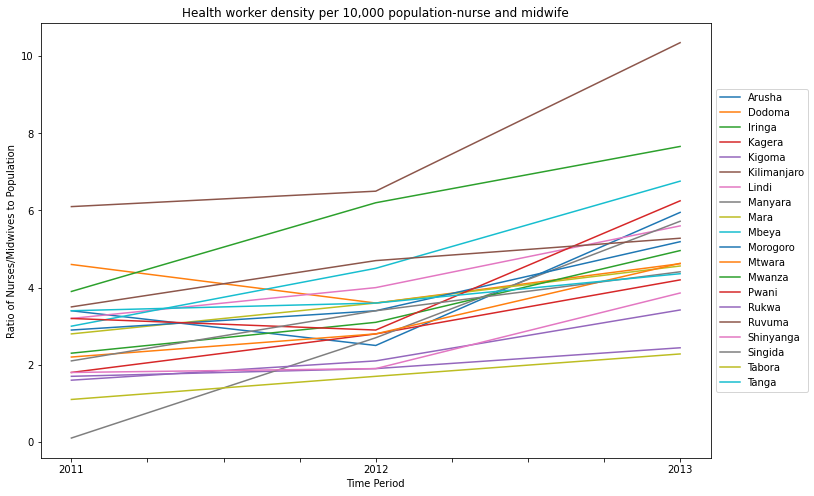

In [629]:
health_worker_nurse_table.plot(figsize=(12,8))
plt.title('Health worker density per 10,000 population-nurse and midwife')
plt.ylabel('Ratio of Nurses/Midwives to Population')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('./images_jp/nurse density.png', transparent=True, bbox_inches = 'tight');

- This is showing the amount of nurses and midwives per 10,000 people. This pattern isn't as extreme as the clinicians, but it does show a steady increase for most regions over the years.

In [444]:
human_dev = socioecon.loc['Human development index'].sort_values(by='Area')
human_dev.head(3)

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Human development index,Percent,Female,Arusha,TZA001002,2012,NBS/MoFP_Tanzania Human Development Report_2014,0.677
Human development index,Percent,Male,Arusha,TZA001002,2012,NBS/MoFP_Tanzania Human Development Report_2014,0.761
Human development index,Percent,Total,Arusha,TZA001002,2012,NBS/MoFP_Tanzania Human Development Report_2014,0.721


In [446]:
human_dev_table = human_dev.pivot_table(values='Data Value', columns='Area', index='Subgroup')

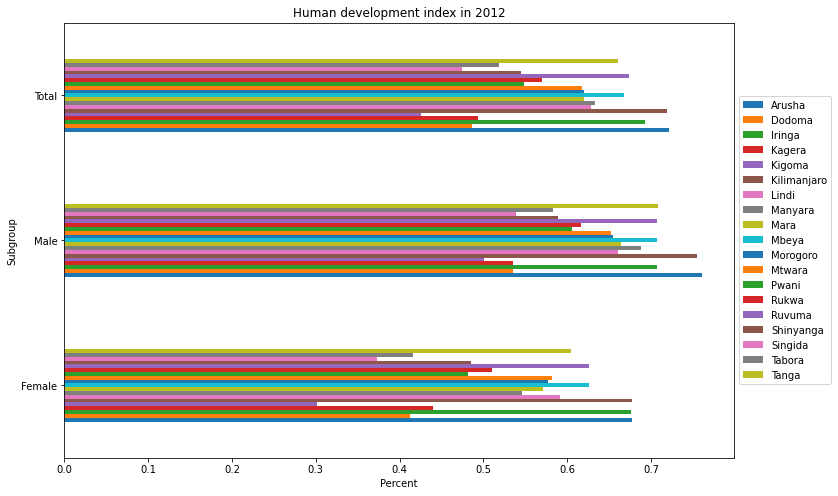

In [473]:
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot-in-matplotlib

human_dev_table.plot(figsize=(12,8), kind='barh')
plt.title('Human development index in 2012')
plt.xlabel('Percent')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));   # remove total??

- This is showing the percentage of the human development index for male, female, and total population for the regions. The overall trend is that males seem to have a higher percentage than females.

In [842]:
human_dev_no_total = socioecon.loc['Human development index'].sort_values(by='Area')
human_dev_no_total = human_dev_no_total[human_dev_no_total['Subgroup']!='Total'] # filtered out the total subgroup
human_dev_no_total.head(3)

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Human development index,Percent,Female,Arusha,TZA001002,2012,NBS/MoFP_Tanzania Human Development Report_2014,0.677
Human development index,Percent,Male,Arusha,TZA001002,2012,NBS/MoFP_Tanzania Human Development Report_2014,0.761
Human development index,Percent,Female,Dodoma,TZA001001,2012,NBS/MoFP_Tanzania Human Development Report_2014,0.413


In [497]:
human_dev_no_total_table = human_dev_no_total.pivot_table(values='Data Value', columns='Area', index='Subgroup')
human_dev_no_total_table

Area,Arusha,Dodoma,Iringa,Kagera,Kigoma,Kilimanjaro,Lindi,Manyara,Mara,Mbeya,Morogoro,Mtwara,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tabora,Tanga
Subgroup,,,,,,,,,,,,,,,,,,,
Female,0.677,0.413,0.676,0.440,0.301,0.678,0.591,0.546,0.571,0.626,0.577,0.582,0.482,0.510,0.626,0.485,0.373,0.416,0.605
Male,0.761,0.536,0.707,0.536,0.501,0.755,0.661,0.688,0.664,0.707,0.655,0.652,0.606,0.617,0.707,0.589,0.539,0.583,0.708


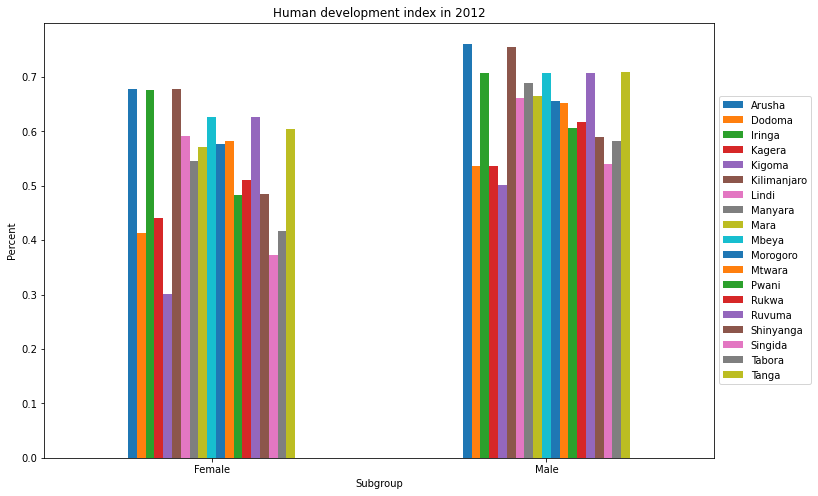

In [630]:
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot-in-matplotlib

human_dev_no_total_table.plot(figsize=(12,8), kind='bar')
plt.title('Human development index in 2012')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('./images_jp/human development.png', transparent=True, bbox_inches = 'tight');

- This is the same graph as above, but without the total. It's easier to see the difference between the males and females per subregion here.

In [576]:
health_insur = socioecon.loc['Health insurance coverage age 15-49'].sort_values(by='Area')
health_insur.head(2)

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value
Indicator,,,,,,,
Health insurance coverage age 15-49,Percent,Female,Arusha,TZA001002,2015-2016,NBS_ TDHS (2015-2016)_2016,0.6
Health insurance coverage age 15-49,Percent,Male,Arusha,TZA001002,2015-2016,NBS_ TDHS (2015-2016)_2016,3.2


In [585]:
health_insur_table = health_insur.pivot_table(values='Data Value', columns='Area', index='Subgroup')
health_insur_table

Area,Arusha,Dodoma,Iringa,Kagera,Kigoma,Kilimanjaro,Lindi,Manyara,Mara,Mbeya,Morogoro,Mtwara,Mwanza,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tabora,Tanga
Subgroup,,,,,,,,,,,,,,,,,,,,
Female,0.6,4.9,0.7,0.7,1.7,3.7,3.2,0.3,0.2,0.0,1.7,1.4,1.9,3.2,1.1,0.7,3.6,2.9,2.9,1.7
Male,3.2,0.0,0.0,5.8,2.5,4.9,2.1,0.0,0.0,0.7,0.0,4.4,0.0,1.1,0.7,0.0,0.0,2.5,0.0,1.6


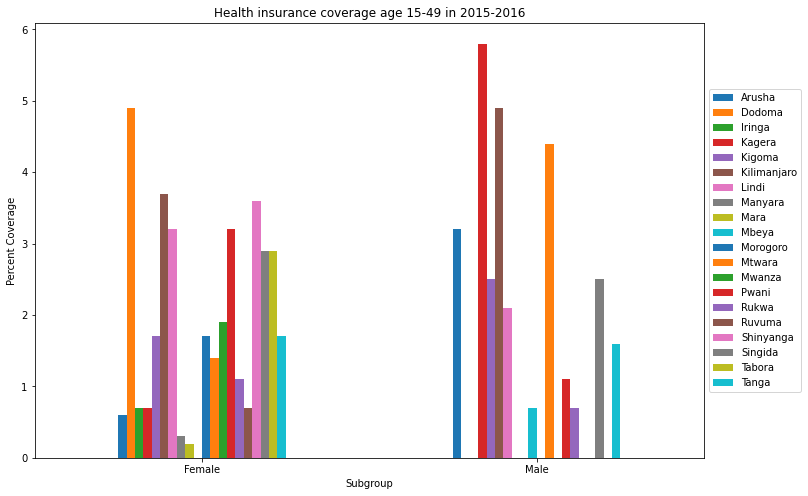

In [631]:
health_insur_table.plot(figsize=(12,8), kind='bar')
plt.title('Health insurance coverage age 15-49 in 2015-2016')
plt.ylabel('Percent Coverage')
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('./images_jp/health insurance coverage.png', transparent=True, bbox_inches = 'tight');

- This is showing the difference in health insurance coverage for the regions. Some regions only had coverage for females, one had coverage for males only, and some were just so distinctly different between the males and females in the regions that did have coverage for both. It's interesting how different it is for each region.

In [843]:
census_rural = census.T[census.T['Subgroup']=='Rural']
census_rural = census_rural[census_rural['Area']!='Mainland']
census_rural = census_rural[census_rural['Area']!='Tanzania']
census_rural = census_rural[census_rural['Area']!='Simiyu']  # filtering out regions not in water pump dataset
census_rural = census_rural[census_rural['Area']!='Njombe']
census_rural = census_rural[census_rural['Area']!='Katavi']
census_rural = census_rural[census_rural['Area']!='Geita']
census_rural = census_rural[census_rural['Time Period']>'1999']  # filtering to more recent years
census_rural.head()

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Water coverage,Percent,Rural,Kilimanjaro,TZA001003,2008,EWURA_Water Utilities Performance Review_Yearly,68.8,NaN
Water coverage,Percent,Rural,Kilimanjaro,TZA001003,2009,EWURA_Water Utilities Performance Review_Yearly,69.09,NaN
Water coverage,Percent,Rural,Kilimanjaro,TZA001003,2010,EWURA_Water Utilities Performance Review_Yearly,68.89,NaN
Water coverage,Percent,Rural,Kilimanjaro,TZA001003,2011,EWURA_Water Utilities Performance Review_Yearly,73.07,NaN
Water coverage,Percent,Rural,Kilimanjaro,TZA001003,2012,EWURA_Water Utilities Performance Review_Yearly,74.444593,NaN


In [854]:
census_urban = census.T[census.T['Subgroup']=='Urban']

In [863]:
census['Water coverage'].T[census['Water coverage'].T['Area']=='Arusha']

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Water coverage,Percent,Rural,Arusha,TZA001002,2009,EWURA_Water Utilities Performance Review_Yearly,66.72,NaN
Water coverage,Percent,Rural,Arusha,TZA001002,2010,EWURA_Water Utilities Performance Review_Yearly,60.84,NaN
Water coverage,Percent,Rural,Arusha,TZA001002,2011,EWURA_Water Utilities Performance Review_Yearly,58.53,NaN
Water coverage,Percent,Rural,Arusha,TZA001002,2012,EWURA_Water Utilities Performance Review_Yearly,60.663329,NaN
Water coverage,Percent,Rural,Arusha,TZA001002,2008,MoWI_Rural Water Supply Database_Yearly,59.6,NaN
Water coverage,Percent,Rural,Arusha,TZA001002,2009,MoWI_Rural Water Supply Database_Yearly,66.72,NaN
Water coverage,Percent,Rural,Arusha,TZA001002,2010,MoWI_Rural Water Supply Database_Yearly,60.84,NaN
Water coverage,Percent,Rural,Arusha,TZA001002,2008,EWURA_Water Utilities Performance Review_Yearly,59.6,NaN
Water coverage,Percent,Rural,Arusha,TZA001002,2011,MoWI_Rural Water Supply Database_Yearly,58.53,NaN


In [848]:
census['Water coverage']

Indicator,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,...,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage,Water coverage
Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
Subgroup,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,...,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural
Area,Katavi,Kilimanjaro,Kilimanjaro,Kilimanjaro,Kilimanjaro,Kilimanjaro,Lindi,Lindi,Lindi,Lindi,...,Rukwa,Kigoma,Shinyanga,Kagera,Mwanza,Mara,Manyara,Njombe,Katavi,Geita
Area ID,TZA001023,TZA001003,TZA001003,TZA001003,TZA001003,TZA001003,TZA001008,TZA001008,TZA001008,TZA001008,...,TZA001015,TZA001016,TZA001017,TZA001018,TZA001019,TZA001020,TZA001021,TZA001022,TZA001023,TZA001025
Time Period,2012,2008,2009,2010,2011,2012,2008,2009,2010,2011,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
Source,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,EWURA_Water Utilities Performance Review_Yearly,...,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly,MoWI_Rural Water Supply Database_Yearly
Data Value,53.0,68.8,69.09,68.89,73.07,74.444593,54.4,51.01,40.12,41.38,...,45.687155,59.621191,51.612049,57.206598,61.98289,49.0,62.908008,63.111356,53.0,53.008118
Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [687]:
census.columns.unique()

Index(['Children under-5 years severely underweight', 'Production of cement',
       'Primary school net enrolment ratio', 'Armed robbery',
       'Cases of child theft', 'Cases of breaking', 'Cases of child desertion',
       'Death cause by road accidents', 'Robbery with violence',
       'Theft of arms',
       ...
       'Facilities with urine dipstick for glucose diagnostics in ANC section',
       'Facilities with urine dipstick for protein diagnostics in ANC section',
       'Annual turnover', 'Broadcasting stations',
       'Ease of doing business (global ranking)',
       'Easy of dealing with construction permits',
       'Children aged 0-17 years both living in multidimensional poverty and below the national basic needs poverty line',
       'Children aged 0-17 years living in multidimensional poverty (having at least 3 deprivations)',
       'Children aged 0-17 years living below the national basic needs poverty line',
       'Women members of parliament'],
      dtype='obj

In [872]:
safe_water_dry = census['Households with access to safe drinking water during the dry season'].T\
    [census['Households with access to safe drinking water during the dry season'].T['Area']=='Tanzania']
safe_water_dry = safe_water_dry[safe_water_dry['Subgroup']!='Total'] # filtering out the rural and urban areas of Tanzania
safe_water_dry

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Households with access to safe drinking water during the dry season,Percent,Rural,Tanzania,TZA,2010-2011,"NBS_Tanzania National Panel Survey (NPS), 2010...",39.8,"TZA_Tanzania National Panel Survey (NPS), 2010..."
Households with access to safe drinking water during the dry season,Percent,Urban,Tanzania,TZA,2010-2011,"NBS_Tanzania National Panel Survey (NPS), 2010...",73.5,"TZA_Tanzania National Panel Survey (NPS), 2010..."
Households with access to safe drinking water during the dry season,Percent,Rural,Tanzania,TZA,2012-2013,"NBS_Tanzania National Panel Survey (NPS), 2012...",41.6,"TZA_Tanzania National Panel Survey (NPS), 2012..."
Households with access to safe drinking water during the dry season,Percent,Urban,Tanzania,TZA,2012-2013,"NBS_Tanzania National Panel Survey (NPS), 2012...",77.7,"TZA_Tanzania National Panel Survey (NPS), 2012..."


In [860]:
safe_water_dry_table = safe_water_dry.pivot_table(values='Data Value', columns='Subgroup', index='Time Period')
safe_water_dry_table

Subgroup,Rural,Urban
Time Period,,
2010-2011,39.8,73.5
2012-2013,41.6,77.7


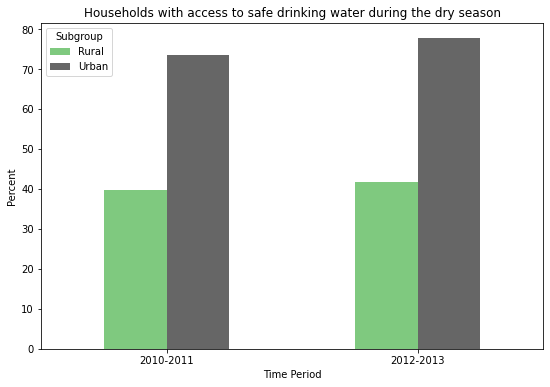

In [783]:
safe_water_dry_table.plot(kind='bar', figsize=(9,6), cmap='Accent')
plt.xticks(rotation=0)
plt.ylabel('Percent')
plt.title('Households with access to safe drinking water during the dry season')
plt.savefig('./images_jp/access to safe water dry season.png', transparent=True, bbox_inches = 'tight');

In [713]:
safe_water_rainy = census['Households with access to safe drinking water during the rainy season'].T\
    [census['Households with access to safe drinking water during the rainy season'].T['Area']=='Tanzania']
safe_water_rainy = safe_water_rainy[safe_water_rainy['Subgroup']!='Total']
safe_water_rainy

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Households with access to safe drinking water during the rainy season,Percent,Rural,Tanzania,TZA,2010-2011,"NBS_Tanzania National Panel Survey (NPS), 2010...",32.3,"TZA_Tanzania National Panel Survey (NPS), 2010..."
Households with access to safe drinking water during the rainy season,Percent,Urban,Tanzania,TZA,2010-2011,"NBS_Tanzania National Panel Survey (NPS), 2010...",66.4,"TZA_Tanzania National Panel Survey (NPS), 2010..."
Households with access to safe drinking water during the rainy season,Percent,Rural,Tanzania,TZA,2012-2013,"NBS_Tanzania National Panel Survey (NPS), 2012...",35.4,"TZA_Tanzania National Panel Survey (NPS), 2012..."
Households with access to safe drinking water during the rainy season,Percent,Urban,Tanzania,TZA,2012-2013,"NBS_Tanzania National Panel Survey (NPS), 2012...",69.1,"TZA_Tanzania National Panel Survey (NPS), 2012..."


In [776]:
safe_water_rainy_table = safe_water_rainy.pivot_table(values='Data Value', columns='Subgroup', index='Time Period')
safe_water_rainy_table

Subgroup,Rural,Urban
Time Period,,
2010-2011,32.3,66.4
2012-2013,35.4,69.1


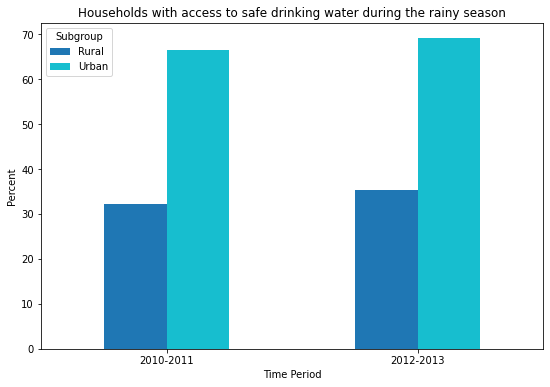

In [785]:
safe_water_rainy_table.plot(kind='bar', figsize=(9,6), cmap='tab10')
plt.xticks(rotation=0)
plt.ylabel('Percent')
plt.title('Households with access to safe drinking water during the rainy season')
plt.savefig('./images_jp/access to safe water rainy season.png', transparent=True, bbox_inches = 'tight');

In [845]:
safe_water_access = pd.concat([safe_water_dry, safe_water_rainy])
safe_water_access  # trying to combine dfs to make one bar chart

,Unit,Subgroup,Area,Area ID,Time Period,Source,Data Value,Footnotes
Indicator,,,,,,,,
Households with access to safe drinking water during the dry season,Percent,Rural,Tanzania,TZA,2010-2011,"NBS_Tanzania National Panel Survey (NPS), 2010...",39.8,"TZA_Tanzania National Panel Survey (NPS), 2010..."
Households with access to safe drinking water during the dry season,Percent,Urban,Tanzania,TZA,2010-2011,"NBS_Tanzania National Panel Survey (NPS), 2010...",73.5,"TZA_Tanzania National Panel Survey (NPS), 2010..."
Households with access to safe drinking water during the dry season,Percent,Rural,Tanzania,TZA,2012-2013,"NBS_Tanzania National Panel Survey (NPS), 2012...",41.6,"TZA_Tanzania National Panel Survey (NPS), 2012..."
Households with access to safe drinking water during the dry season,Percent,Urban,Tanzania,TZA,2012-2013,"NBS_Tanzania National Panel Survey (NPS), 2012...",77.7,"TZA_Tanzania National Panel Survey (NPS), 2012..."
Households with access to safe drinking water during the rainy season,Percent,Rural,Tanzania,TZA,2010-2011,"NBS_Tanzania National Panel Survey (NPS), 2010...",32.3,"TZA_Tanzania National Panel Survey (NPS), 2010..."
Households with access to safe drinking water during the rainy season,Percent,Urban,Tanzania,TZA,2010-2011,"NBS_Tanzania National Panel Survey (NPS), 2010...",66.4,"TZA_Tanzania National Panel Survey (NPS), 2010..."
Households with access to safe drinking water during the rainy season,Percent,Rural,Tanzania,TZA,2012-2013,"NBS_Tanzania National Panel Survey (NPS), 2012...",35.4,"TZA_Tanzania National Panel Survey (NPS), 2012..."
Households with access to safe drinking water during the rainy season,Percent,Urban,Tanzania,TZA,2012-2013,"NBS_Tanzania National Panel Survey (NPS), 2012...",69.1,"TZA_Tanzania National Panel Survey (NPS), 2012..."


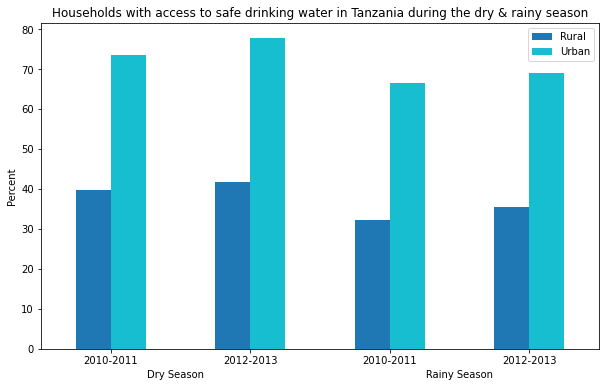

In [846]:
pd.concat([safe_water_dry_table, safe_water_rainy_table]).plot(kind='bar', figsize=(10,6), cmap='tab10')
plt.xticks(rotation=0)  # combined both into one chart for easier interpretation
plt.ylabel('Percent')
plt.xlabel('Dry Season                                                                       Rainy Season')
plt.title('Households with access to safe drinking water in Tanzania during the dry & rainy season')
plt.legend(loc='upper right')
plt.savefig('./images_jp/access to water combined.png', transparent=True, bbox_inches = 'tight');